<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" align="right" width="30%">

# Xarray: Data structures for high-level analysis of multi-dimensional data

In this lesson, we discuss cover the basics of Xarray data structures. By the end of the lesson, we will be able to:

- Understand the basic data structures in Xarray
- Inspect `DataArray` and `Dataset` objects.
- Read and write netCDF files using Xarray.
- Understand that there are many packages that build on top of xarray

## A practical example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import inspect
import glob

%matplotlib inline

In [3]:
# load tutorial dataset
ds = xr.tutorial.load_dataset("air_temperature")

#files = glob.glob("C:\\Users\\s2126908\\OneDrive\\Oceanography Coursework\\PhD/data/SMOS_ARCTIC_SSS_L3_LOCEAN/netcdf_monthly_v1_1/*")
#files
#ds = xr.open_dataset("C:\\Users\\s2126908\\OneDrive\\Oceanography Coursework\\PhD/data/SMOS_ARCTIC_SSS_L3_LOCEAN/netcdf_monthly_v1_1/SMOS-arctic-LOCEAN-SSS-2010-06-v1.0AT-monthly.nc")

#print(inspect.getsource(xr.tutorial))

## What's in a dataset? many DataArrays

In [4]:
# dataset repr
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Datasets are dict-like containers of DataArrays i.e. they are a mapping of variable name to DataArray.

In [47]:
# pull out "air" dataarray
ds['air'] #.air #.isel(time=range(0,10)) #.sel(time=slice('2013-02', '2013-03')) #ds["air"]

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [48]:
# pull out dataarray using dot notation
ds.air  ## same as ds["air"]

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## What's in a DataArray? data + (a lot of) metadata

### Named dimensions `.dims`

In [49]:
ds.air.dims

('time', 'lat', 'lon')

### Coordinate variables or "tick labels" (`.coords`)

In [50]:
ds.air.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [51]:
# extracting coordinate variables
ds.air.lon

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [52]:
# extracting coorindate variables from .coords
#ds.coords["lon"]
ds.lon

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

### Arbitrary attributes (`.attrs`)

`.attrs` is a dictionary that can contain arbitrary python objects. Your only limitation is that some attributes may not be writeable to a netCDF file

In [53]:
ds.air.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

In [54]:
# assign your own attribute
ds.air.attrs["who_is_awesome"] = "xarray"
ds.air.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32),
 'who_is_awesome': 'xarray'}

### Underlying data (`.data`)

This is a numpy array which you may be familiar with. Xarray structures wrap underlying simpler data structures. 

This part of xarray is quite extensible allowing for GPU arrays, sparse arrays, arrays with units etc. See the demo at the end.

In [55]:
ds.air.values #.data

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   

In [56]:
# what is the type of the underlying data
type(ds.air.data)

numpy.ndarray

A numpy array!

<!-- <img src="https://numpy.org/images/logos/numpy.svg" style="width:20%"> -->
<img src="https://numpy.org/images/logo.svg" style="width:20%">


### Review


Xarray provides two main data structures
* DataArrays that wrap underlying data containers (e.g. numpy arrays) and contain associated metadata
* Datasets that are dict-like containers of DataArrays

For more see
* https://xarray.pydata.org/en/stable/data-structures.html#dataset
* https://xarray.pydata.org/en/stable/data-structures.html#dataarray

---

## Why xarray? Use metadata for fun and ~profit~ papers!

### Analysis without xarray: `X(`

<ipython-input-57-0f3446d5e912>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon, lat, temp[0, :, :])


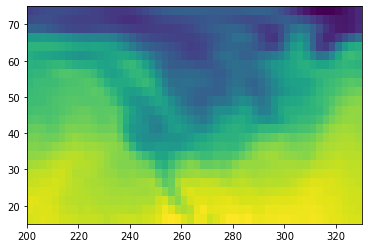

In [57]:
# plot the first timestep
lat = ds.air.lat.data  # numpy array
lon = ds.air.lon.data  # numpy array
temp = ds.air.data  # numpy array
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :])

In [58]:
temp.mean(axis=1)  ## what did I just do? I can't tell by looking at this line. 

array([[279.39798, 279.6664 , 279.66122, ..., 279.9508 , 280.31522,
        280.6624 ],
       [279.05722, 279.538  , 279.7296 , ..., 279.77563, 280.27002,
        280.79764],
       [279.0104 , 279.2808 , 279.5508 , ..., 279.682  , 280.19763,
        280.81403],
       ...,
       [279.63   , 279.934  , 280.534  , ..., 279.802  , 280.346  ,
        280.77798],
       [279.398  , 279.66602, 280.31796, ..., 279.766  , 280.34198,
        280.834  ],
       [279.27   , 279.354  , 279.88202, ..., 279.42596, 279.96997,
        280.48196]], dtype=float32)

### Analysis with xarray `=)`

How readable is this code?

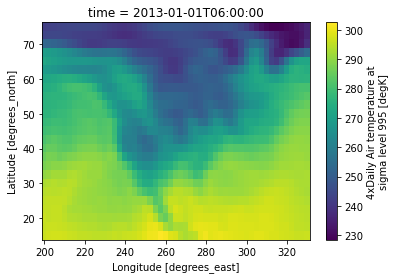

In [59]:
plt.figure()
ds.air.isel(time=1).plot(x="lon")

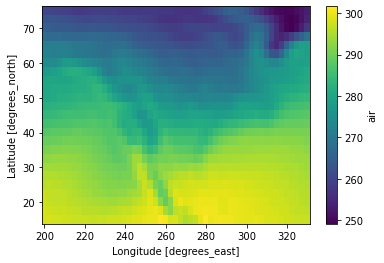

In [60]:
plt.figure()
ds.air.mean("time").plot()

---

## Extracting data or "indexing" : `.sel`, `.isel`

Xarray supports 
* label-based indexing using `.sel`
* position-based indexing using `.isel`

For more see https://xarray.pydata.org/en/stable/indexing.html

### Label-based indexing

Xarray inherits its label-based indexing rules from pandas; this means great support for dates and times!

In [61]:
# pull out data for all of 2013-May
ds.sel(time="2013-05")

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 124)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.19998 259.29 259.1 ... 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [62]:
# demonstrate slicing
ds.sel(time=slice("2013-05", "2013-07"))

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 368)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-07-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.19998 259.29 259.1 ... 299.5 299.69998
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [63]:
# demonstrate "nearest" indexing
ds.sel(lon=240.2, method="nearest")

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    lon      float32 240.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float32 239.59999 237.2 ... 296.88998 298.38998
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [64]:
# "nearest indexing at multiple points"
ds.sel(lon=[240.125, 234], lat=[40.3, 50.3], method="nearest")

<xarray.Dataset>
Dimensions:  (lat: 2, lon: 2, time: 2920)
Coordinates:
  * lat      (lat) float32 40.0 50.0
  * lon      (lon) float32 240.0 235.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 268.1 283.0 265.5 ... 285.19 256.79 268.59
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Position-based indexing


This is similar to your usual numpy `array[0, 2, 3]` but with the power of named dimensions!

In [65]:
# pull out time index 0 and lat index 0
ds.air.isel(time=0, lat=0)  #  much better than ds.air[0, 0, :]

<xarray.DataArray 'air' (lon: 53)>
array([241.2    , 242.5    , 243.5    , 244.     , 244.09999, 243.89   ,
       243.59999, 243.09999, 242.5    , 241.89   , 241.2    , 240.29999,
       239.5    , 238.79999, 238.5    , 238.7    , 239.59999, 241.     ,
       242.89   , 244.79999, 246.5    , 247.79999, 248.59999, 249.     ,
       249.09999, 249.09999, 249.     , 248.89   , 248.7    , 248.59999,
       248.39   , 248.29999, 248.29999, 248.59999, 249.     , 249.5    ,
       249.59999, 249.09999, 247.79999, 245.39   , 242.2    , 238.5    ,
       234.7    , 231.29999, 228.79999, 227.29999, 227.     , 227.5    ,
       228.79999, 230.59999, 232.79999, 235.5    , 238.59999],
      dtype=float32)
Coordinates:
    lat      float32 75.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [66]:
# demonstrate slicing
ds.air.isel(lat=slice(10))

<xarray.DataArray 'air' (time: 2920, lat: 10, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [274.79   , 275.19998, 275.6    , ..., 277.19998, 277.     ,
         277.     ],
        [275.9    , 276.9    , 276.9    , ..., 280.9    , 280.5    ,
         279.69998],
        [276.69998, 277.4    , 277.69998, ..., 283.29   , 284.1    ,
         283.9    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [275.59   , 276.29   , 277.49   , ..., 275.19   , 275.79   ,
         276.59   ],
        [276.88998, 277.88998, 278.69   , ..., 273.59   , 274.29   ,
         275.29   ],
        [276.79   , 277.29   , 278.29   , ..., 274.19   , 275.38998,
         276.88998]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [274.29   , 274.49   , 275.59   , ..., 274.69   , 274.99   ,
         275.38998],
        [276.79   , 277.49   , 277.99   , ..., 273.19   , 273.59   ,
         274.19   ],
        [276.88998, 277.29   , 277.59   , ..., 273.79   , 274.99   ,
         276.19   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

---
## Concepts for computation

### Broadcasting: expanding data

Let's try to calculate grid cell area associated with the air temperature data. We will use this to make a proper domain-average

A very approximate formula is

\begin{equation}
Δlat \times Δlon \times \cos(\text{latitude}) 
\end{equation}

assuming that $Δlon$ = 111km and $Δlat$ = 111km

In [67]:
dlon = np.cos(ds.air.lat * np.pi / 180) * 111e3
dlon

<xarray.DataArray 'lat' (lat: 25)>
array([ 28728.904,  33378.348,  37964.223,  42477.86 ,  46910.625,
        51254.094,  55499.996,  59640.254,  63666.984,  67572.516,
        71349.43 ,  74990.51 ,  78488.85 ,  81837.78 ,  85030.93 ,
        88062.22 ,  90925.875,  93616.445,  96128.82 ,  98458.2  ,
       100600.164, 102550.625, 104305.88 , 105862.58 , 107217.766],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0

In [68]:
dlat = 111e3 * xr.ones_like(ds.air.lon)
dlat

<xarray.DataArray 'lon' (lon: 53)>
array([111000., 111000., 111000., 111000., 111000., 111000., 111000.,
       111000., 111000., 111000., 111000., 111000., 111000., 111000.,
       111000., 111000., 111000., 111000., 111000., 111000., 111000.,
       111000., 111000., 111000., 111000., 111000., 111000., 111000.,
       111000., 111000., 111000., 111000., 111000., 111000., 111000.,
       111000., 111000., 111000., 111000., 111000., 111000., 111000.,
       111000., 111000., 111000., 111000., 111000., 111000., 111000.,
       111000., 111000., 111000., 111000.], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [69]:
cell_area = dlon * dlat
cell_area

<xarray.DataArray (lat: 25, lon: 53)>
array([[3.1889083e+09, 3.1889083e+09, 3.1889083e+09, ..., 3.1889083e+09,
        3.1889083e+09, 3.1889083e+09],
       [3.7049966e+09, 3.7049966e+09, 3.7049966e+09, ..., 3.7049966e+09,
        3.7049966e+09, 3.7049966e+09],
       [4.2140288e+09, 4.2140288e+09, 4.2140288e+09, ..., 4.2140288e+09,
        4.2140288e+09, 4.2140288e+09],
       ...,
       [1.1577953e+10, 1.1577953e+10, 1.1577953e+10, ..., 1.1577953e+10,
        1.1577953e+10, 1.1577953e+10],
       [1.1750746e+10, 1.1750746e+10, 1.1750746e+10, ..., 1.1750746e+10,
        1.1750746e+10, 1.1750746e+10],
       [1.1901172e+10, 1.1901172e+10, 1.1901172e+10, ..., 1.1901172e+10,
        1.1901172e+10, 1.1901172e+10]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

The result has two dimensions because xarray realizes that dimensions `lon` and `lat` are different so it automatically "broadcasts" to get a 2D result. See the last row in this image from *Jake VanderPlas Python Data Science Handbook*

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">


Because xarray knows about dimension names we avoid having to create unnecessary size-1 dimensions using `np.newaxis` or `.reshape`. For more, see https://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name


---

### Alignment: putting data on the same grid

When doing arithmetic operations xarray automatically "aligns" i.e. puts the data on the same grid. In this case `cell_area` and `ds.air` are at the same lat, lon points so things are multiplied as you would expect

In [70]:
(cell_area * ds.air.isel(time=1))

<xarray.DataArray (lat: 25, lon: 53)>
array([[7.72034658e+11, 7.73948047e+11, 7.75223575e+11, ...,
        7.39826729e+11, 7.44928969e+11, 7.51944532e+11],
       [9.02537150e+11, 9.04389657e+11, 9.04760132e+11, ...,
        8.55854219e+11, 8.61411738e+11, 8.73267659e+11],
       [1.06699207e+12, 1.06568575e+12, 1.06235665e+12, ...,
        9.72597821e+11, 9.83512187e+11, 1.00504587e+12],
       ...,
       [3.43170535e+12, 3.42591642e+12, 3.42938957e+12, ...,
        3.42012723e+12, 3.41665409e+12, 3.41306507e+12],
       [3.48057082e+12, 3.48644626e+12, 3.48750401e+12, ...,
        3.47352072e+12, 3.47234553e+12, 3.46764529e+12],
       [3.52619830e+12, 3.53702799e+12, 3.53940852e+12, ...,
        3.52750718e+12, 3.52750718e+12, 3.52988771e+12]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01T06:00:00

Now lets make `cell_area` unaligned i.e. change the coordinate labels

In [71]:
# make a copy of cell_area
# then add 1e-5 to lat
cell_area_bad = cell_area.copy(deep=True)
cell_area_bad["lat"] = cell_area.lat + 1e-5
cell_area_bad

<xarray.DataArray (lat: 25, lon: 53)>
array([[3.1889083e+09, 3.1889083e+09, 3.1889083e+09, ..., 3.1889083e+09,
        3.1889083e+09, 3.1889083e+09],
       [3.7049966e+09, 3.7049966e+09, 3.7049966e+09, ..., 3.7049966e+09,
        3.7049966e+09, 3.7049966e+09],
       [4.2140288e+09, 4.2140288e+09, 4.2140288e+09, ..., 4.2140288e+09,
        4.2140288e+09, 4.2140288e+09],
       ...,
       [1.1577953e+10, 1.1577953e+10, 1.1577953e+10, ..., 1.1577953e+10,
        1.1577953e+10, 1.1577953e+10],
       [1.1750746e+10, 1.1750746e+10, 1.1750746e+10, ..., 1.1750746e+10,
        1.1750746e+10, 1.1750746e+10],
       [1.1901172e+10, 1.1901172e+10, 1.1901172e+10, ..., 1.1901172e+10,
        1.1901172e+10, 1.1901172e+10]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.00001 72.50001 70.00001 ... 17.50001 15.00001
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [72]:
cell_area_bad * ds.air.isel(time=1)

C:\Users\s2126908\.conda\envs\pah_enviro\lib\site-packages\xarray\core\alignment.py:307: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)


<xarray.DataArray (lat: 0, lon: 53)>
array([], shape=(0, 53), dtype=float32)
Coordinates:
  * lat      (lat) float64 
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01T06:00:00

**Tip:** If you notice extra NaNs or missing points after xarray computation, it means that your xarray coordinates were not aligned *exactly*.

For more, see https://xarray.pydata.org/en/stable/computation.html#automatic-alignment

---

## High level computation: `groupby`, `resample`, `rolling`, `coarsen`, `weighted`

Xarray has some very useful high level objects that let you do common computations:

1. `groupby` : [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
1. `resample` : [Groupby specialized for time axes. Either downsample or upsample your data.](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations)
1. `rolling` : [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
1. `coarsen` : [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
1. `weighted` : [Weight your data before reducing](https://xarray.pydata.org/en/stable/computation.html#weighted-array-reductions)

### groupby

In [73]:
# seasonal groups
ds.groupby("time.season")

DatasetGroupBy, grouped over 'season' 
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [74]:
# make a seasonal mean
seasonal_mean = ds.groupby("time.month").mean()
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, month: 12)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 246.34987 246.38608 ... 297.53763

### resample

In [75]:
# resample to monthly frequency
ds.resample(time="M").mean()

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 24)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-31 2013-02-28 ... 2014-12-31
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Data variables:
    air      (time, lat, lon) float32 244.4667 244.66354 ... 297.72318 297.71024

### weighted

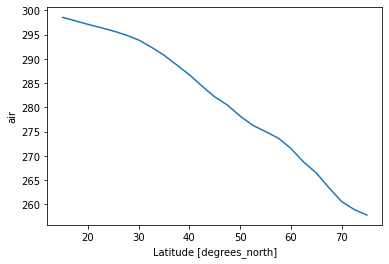

In [76]:
# weight by cell_area and take mean over (time, lon)
ds.weighted(cell_area).mean(["lon", "time"]).air.plot()

---

## Visualization: `.plot`

For more see https://xarray.pydata.org/en/stable/plotting.html and https://xarray.pydata.org/en/stable/examples/visualization_gallery.html

In [77]:
# facet the seasonal_mean
seasonal_mean.air.plot(col="season")

ValueError: Only 1d and 2d plots are supported for facets in xarray. See the package `Seaborn` for more options.

In [ ]:
# contours
seasonal_mean.air.plot.contour(col="season", levels=20, add_colorbar=True)

In [ ]:
# line plots too? wut
seasonal_mean.air.mean("lon").plot.line(hue="season", y="lat")

---

## Reading and writing to disk

Xarray supports many disk formats. Below is a small example using netCDF. For more see https://xarray.pydata.org/en/stable/io.html



In [ ]:
# write ds to netCDF
ds.to_netcdf("my-example-dataset.nc")

In [ ]:
# read from disk
fromdisk = xr.open_dataset("my-example-dataset.nc")
fromdisk

In [ ]:
# check that the two are identical
ds.identical(fromdisk)

**Tip:** A common use case to read datasets that are a collection of many netCDF files.  See https://xarray.pydata.org/en/stable/io.html#reading-multi-file-datasets for how to handle that

---

# More information

1. A description of common terms used in the xarray documentation: https://xarray.pydata.org/en/stable/terminology.html
1. For information on how to create a DataArray from an existing numpy array: https://xarray.pydata.org/en/stable/data-structures.html#creating-a-dataarray
1. Answers to common questions on "how to do X" are here: https://xarray.pydata.org/en/stable/howdoi.html
1. Our more extensive Scipy 2020 tutorial material: https://xarray-contrib.github.io/xarray-tutorial/

---

# The scientific python / pangeo ecosystem: demo

Xarray ties in to the larger scientific python ecosystem and in turn many packages build on top of xarray. A long list of such packages is here: https://xarray.pydata.org/en/stable/related-projects.html.


Now we will demonstrate some cool features.

## Pandas: tabular data structures 

You can easily convert between xarray and pandas structures: https://pandas.pydata.org/

This allows you to conveniently use the extensive pandas ecosystem of packages (like seaborn) for your work.

See https://xarray.pydata.org/en/stable/pandas.html

In [ ]:
# convert to pandas dataframe
df = ds.isel(time=slice(10)).to_dataframe()
df

In [ ]:
# convert dataframe to xarray
df.to_xarray()

## xarray can wrap other array types, not just numpy


<img src="https://docs.dask.org/en/latest/_static/images/dask-horizontal-white.svg" style="width:25%"> 

**dask** : parallel arrays https://xarray.pydata.org/en/stable/dask.html & https://docs.dask.org/en/latest/array.html 


<img src="https://sparse.pydata.org/en/stable/_images/logo.png" style="width:12%"> 

**pydata/sparse** : sparse arrays http://sparse.pydata.org

<img src="https://raw.githubusercontent.com/cupy/cupy.dev/master/images/cupy_logo.png" style="width:22%">

**cupy** : GPU arrays http://cupy.chainer.org


<img src="https://pint.readthedocs.io/en/stable/_images/logo-full.jpg" style="width:10%">

**pint** : unit-aware computations https://pint.readthedocs.org & https://github.com/xarray-contrib/pint-xarray

### Xarray + dask

Dask cuts up NumPy arrays into blocks and parallelizes your analysis code across these blocks

<img src="https://dask.org/_images/dask-array-black-text.svg" style="width:55%">

In [ ]:
# make dask cluster; this is for demo purposes
import dask
import distributed

cluster = distributed.LocalCluster()

In [ ]:
# demonstrate dask dataset
dasky = xr.tutorial.open_dataset(
    "air_temperature", 
    chunks={"time": 100}, # 100 time steps in each block
)

dasky.air

In [ ]:
# demonstrate lazy mean
dasky.air.mean()

In [ ]:
# "compute" the mean
dasky.air.mean().compute()

## holoviews: javascript interactive plots

the ``hvplot`` package is a nice easy way to access [holoviews](http://holoviews.org/) functionality. It attaches itself to all xarray objects under the `.hvplot` namespace. So instead of using `.plot` use `.hvplot`

In [ ]:
import hvplot.xarray

ds.air.hvplot(groupby="time", clim=(270, 300))

### cf_xarray : use even more metadata for even more fun and ~profit~ papers

[cf_xarray](https://cf-xarray.readthedocs.io/) is a new project that tries to let you make use of other CF attributes that xarray ignores. It attaches itself to all xarray objects under the `.cf` namespace

In [ ]:
import cf_xarray

In [ ]:
# describe cf attributes in dataset
ds.air.cf.describe()

In [ ]:
# demonstrate equivalent of .mean("lat")
ds.air.cf.mean("latitude")

In [ ]:
# demonstrate indexing
ds.air.cf.sel(longitude=242.5, method="nearest")

### Other cool packages


* xgcm : grid-aware operations with xarray objects
* xrft : fourier transforms with xarray
* xclim : calculating climate indices with xarray objects
* intake : forget about file paths
* rioxarray : raster files and xarray
* xesmf : regrid using ESMF
* MetPy : tools for working with weather data

More here: https://xarray.pydata.org/en/stable/related-projects.html